# TP n°1 des modules RT2R05 et R2R06 
 Jalain Enzo & Treard Louis (RT1 FI A2 - 2024)
 


## 1. Analyse de signaux périodiques 

### De la transformé de Fourier à la FFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


$$x(t) = 1.\cos(2\pi . 1000 . t)
$$

**7. Préciser l'amplitude du signal :**
_L'amplitude du signal est 1_ $$\color{red}1 \color{reset} .\cos(2\pi . 1000 . t) $$

**8. Modéliser ce signal qu'on appellera y(t) comme le produit d'une porte et d'un cosinus** : $$ y(t) = \Pi_{T_0} . x(t) $$

**9. En déduire la transformé de fourier du signal :**  $$ Y(f) = T_0 . sinc(\pi . f . T_0)\ \ \  * \ \ \  \frac{1}{2} [\delta (f+f_0) + \delta (f-f_0) ] $$

$$ Y(f) = T_0 . sinc(f + 1000) + T_0 . sinc(f - 1000)$$

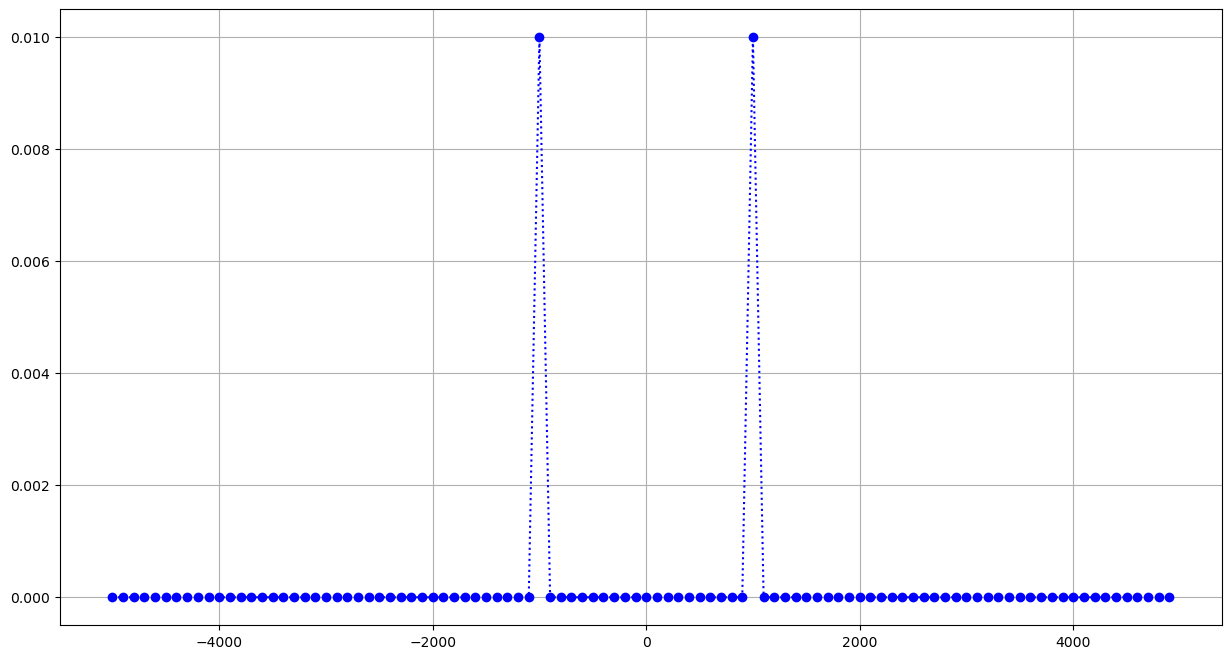

In [2]:
centre = 5
largeur = 10
frequence= np.arange(-5000, 5000, 100)
T0 = 10e-3
Y_theorique = T0*np.sinc(frequence+1000) + T0*np.sinc(frequence-1000)


fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(frequence, Y_theorique, 'b:o')
ax.grid()


### Création du signal sinusoidal entre -5ms et 5 ms

In [3]:
start = -5e-3
stop = 5e-3
tfft = stop-start
te = 1e-4
fe = 1/te
f0 = 1000
temps = np.arange(start, stop, te)

y = np.sin(2*np.pi*f0*temps)
N = len(y)


14. il faut mutliplier la fft par $\frac{1}{N}$ pour retrouver la fonction dans le domaine temporelle

In [4]:
#Cacul de la FFT bilatérale
Y_pratique = tfft/N*np.fft.fftshift(np.fft.fft(y))
#Module de la FFT
Y_abs = np.abs(Y_pratique)

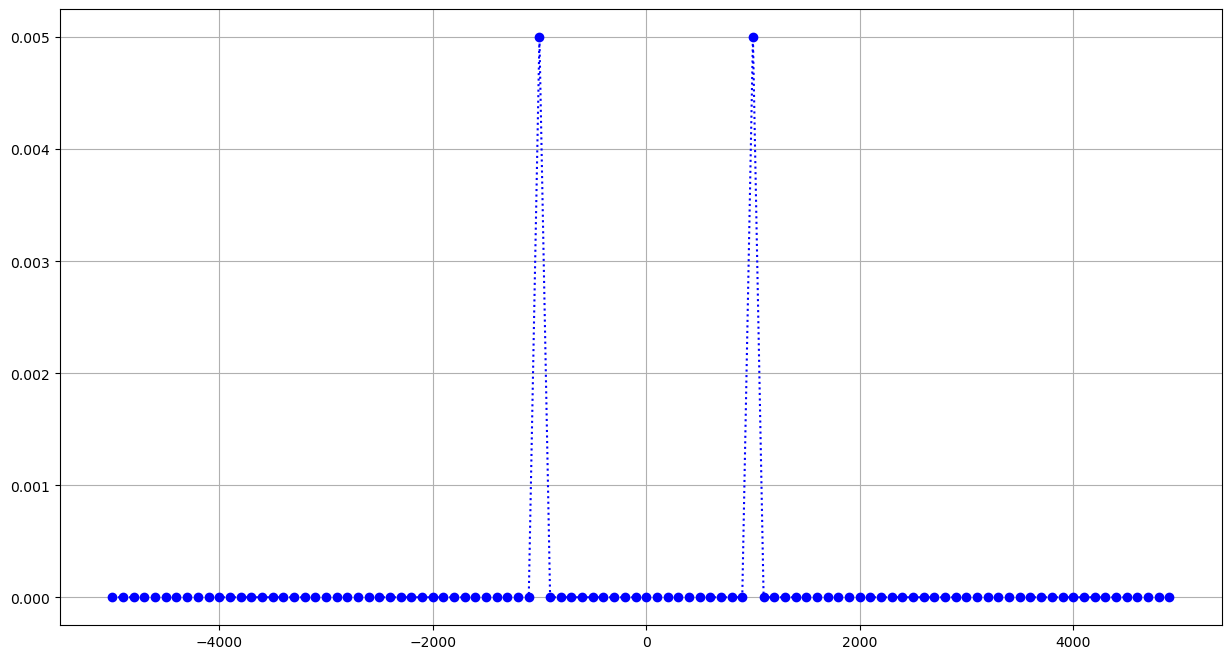

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(frequence, Y_abs, 'b:o')
ax.grid()

16. Pour retrouver la fréquence d'échantillonnage avec la période on utilise : $\frac{1}{Te}$. Ensuite pour avoir le nombre de points N sur la durée du signal on utilise $(tfft*Fe)$ avec tfft la durée du signal. La plage de fréquence du signal est un vecteur compris entre $\frac{-fe}{2}$ et $\frac{fe}{2}$ par pas de $\frac{fe}{N}$. On donne ensuite la résolution en fréquence $ RBW = \frac{1}{tfft}$ avec tfft la durée du signal.

In [6]:
# Fréquence d'échantillonnage :
fe = 1/te
# Nombre de points sur la durée du signal
N = (tfft*fe)
# plage de fréquence du signal
f = np.arange(-fe/2, fe/2, fe/N)
# RBW
RBW = 1/tfft 


### Tracé de la FFT sur RBW

In [7]:
# Signal de la FFT sur RBW
Y_pratique = 1/RBW*np.fft.fftshift(np.fft.fft(y))
# Module de la FFT sur RBW
Y_abs = np.abs(Y_pratique)

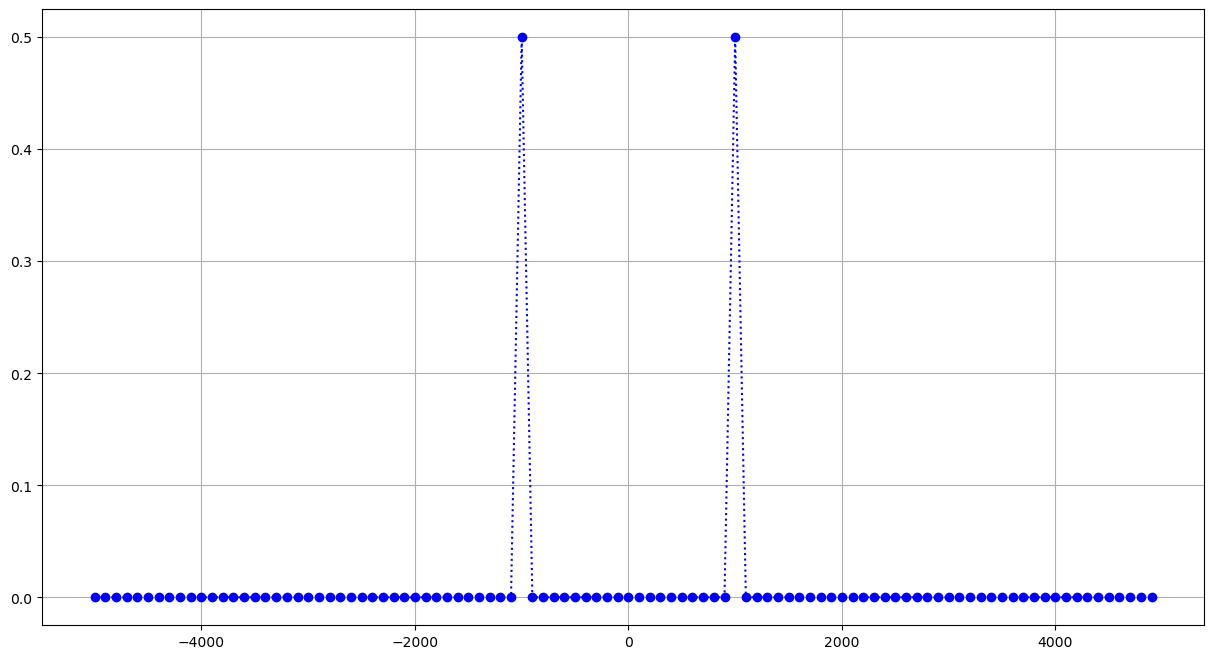

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(frequence, Y_abs, 'b:o')
ax.grid()

## 2. Affichage en Volt efficace et en dBm sur les appareils de mesures

### Calcul de la $DST_{eff_{k}}$ et $DST_{dB{k}}$

In [9]:
# Calcul du nombre de points
N = len(y)
tfft = N*te

#Calcul de la FFT bilatérale
Y_signal = 1/N*(np.fft.fft(y))

#Calcul de la FFT Mono latérale
Y_signal_mono = np.concatenate((Y_signal[0:1], 2*Y_signal[1:int(N/2)]))
Y_mod = np.abs(Y_signal_mono)


# Calcul de la Densité spectrale en Volt efficace sur RBW
Y_eff = Y_mod/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
Y_dBm = 10*np.log10(np.square(Y_eff)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f = np.arange(0, fe/2, fe/N)
max(Y_dBm)

9.99999999999999

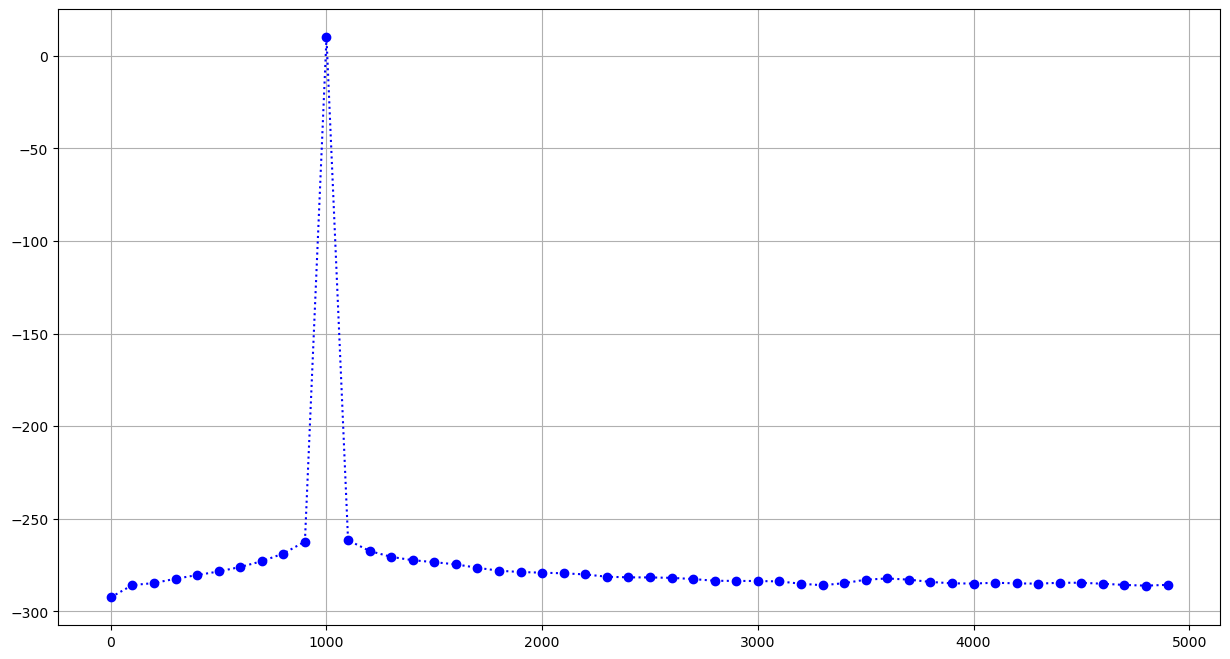

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(f, Y_dBm, 'b:o')
ax.grid()

In [11]:

# Affichage des modules des valeurs à 1000 hz en Volt sur RBW et en dBm sur RBW

print(np.abs(max(Y_pratique)))
print(max(Y_dBm))

0.49999999999999944
9.99999999999999


Allure du signal sinusoidale de la  FFT en Volt efficace et en dBm

**Signal en dBm**

![Signal en dBm](Screenshot_1.png)

**Signal en Volt efficace**

![Signal en Volt Efficace](Screenshot_2.png)

### Analyse spéctrale de signaux périodiques avec l'osciloscope à FFT

**Signal Triangulaire**

![Signal en dBm](Screenshot_3.png)

**Signal Carré**

![Signal en dBm](Screenshot_4.png)

Conclusion :
Chaque signal périodique peut être décomposé en somme de signaux périodiques qui ont chacun une transformé de fourrier avec un coefficient pour le dirac différents, cette somme de signaux périodiques s'appel une série de fourrier.

# III Analyse et Filtrage d'un signal Audio

## 1. Analayse temporelle et spéctrale d'un signal audio 

In [12]:
import soundfile as sf

In [13]:
!sox --i "NR2.wav"


Input File     : 'NR2.wav'
Channels       : 1
Sample Rate    : 8000
Precision      : 16-bit
Duration       : 00:04:41.47 = 2251755 samples ~ 21110.2 CDDA sectors
File Size      : 4.50M
Bit Rate       : 128k
Sample Encoding: 16-bit Signed Integer PCM



### Récupération des information du signal audio NR2.wav

In [14]:
# Récupération des données du fichier audio NR2.wav
data, fe = sf.read("NR2.wav") 
print(data.shape)
# Récupération de la tranche du signal entre 10 et 12 secondes
tranche = data[int(10*fe):int(12*fe)]


(2251755,)


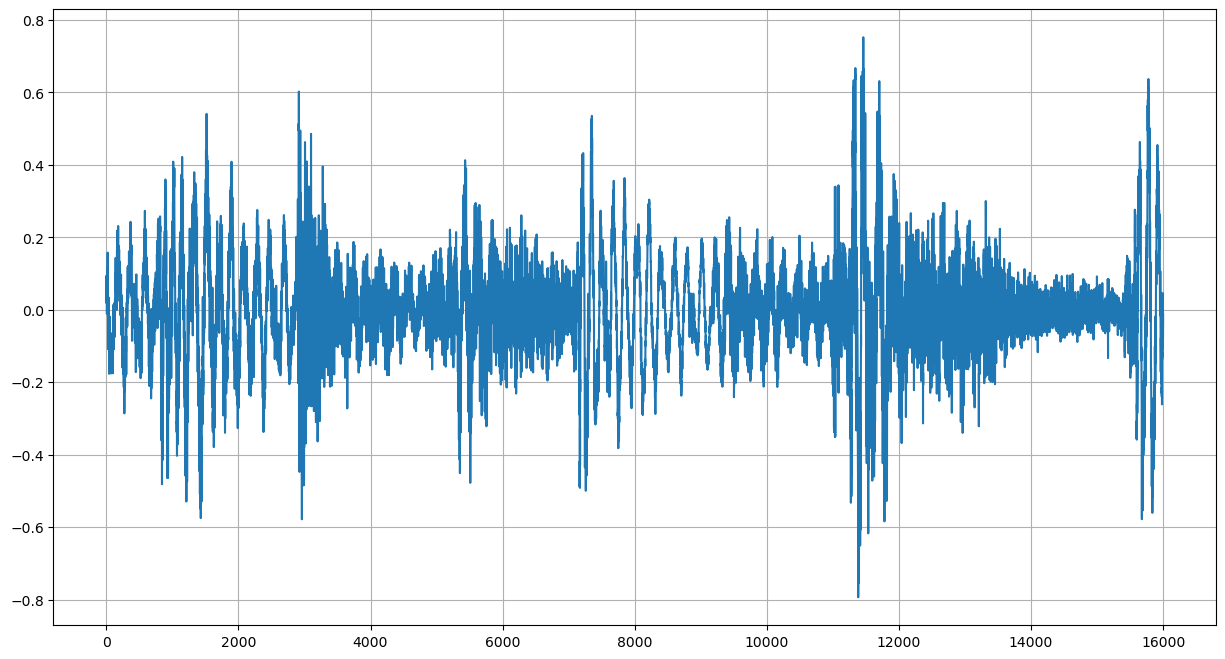

In [15]:
# Affichage de la tranche du signal
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(tranche)
ax.grid()


### Calcul de la $DST_{eff_{k}}$ et $DST_{dB{k}}$

In [16]:
# Calcul du nombre de points
N = len(tranche)
tfft = N*te

#Calcul de la FFT bilatérale
Y_tranche = 1/N*(np.fft.fft(tranche))

#Calcul de la FFT Mono latérale
Y_tranche_mono = np.concatenate((Y_tranche[0:1], 2*Y_tranche[1:int(N/2)]))
Y_tranche_mod = np.abs(Y_tranche_mono)


# Calcul de la Densité spectrale en Volt efficace sur RBW
Y_eff_tranche = Y_tranche_mod/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
Y_dBm_tranche = 10*np.log10(np.square(Y_eff_tranche)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f_tranche = np.arange(0, fe/2, fe/N)


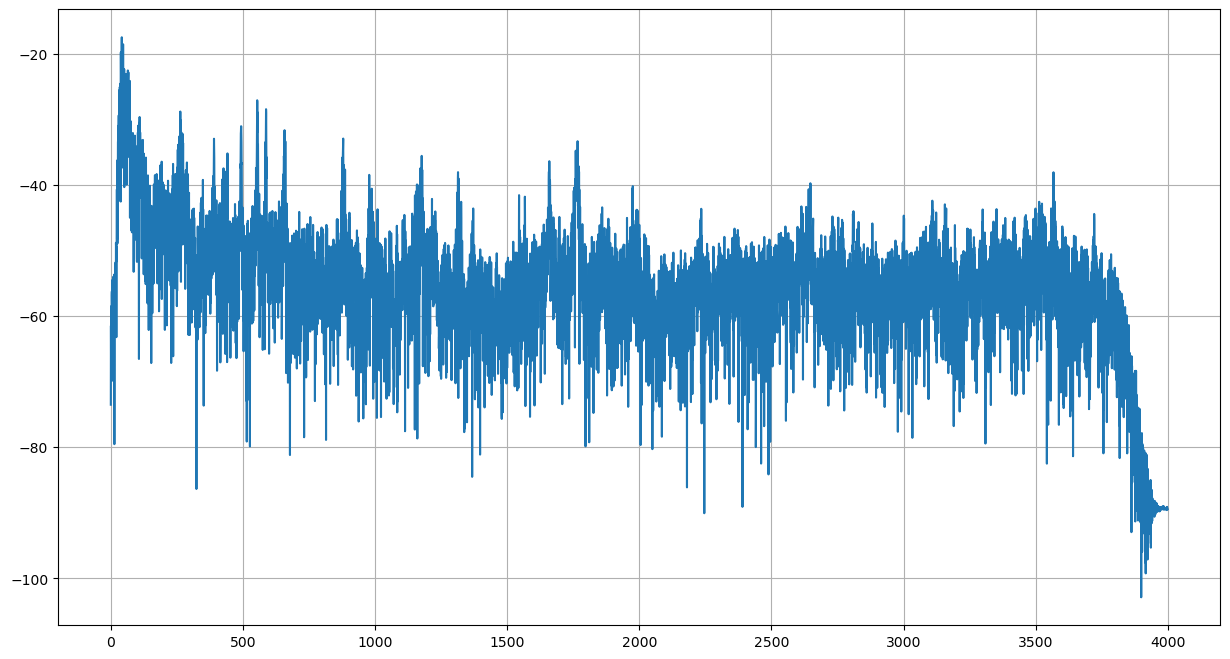

In [17]:
# plot de la FFT de la tranche du signal En dBm
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(f_tranche, Y_dBm_tranche)
ax.grid()


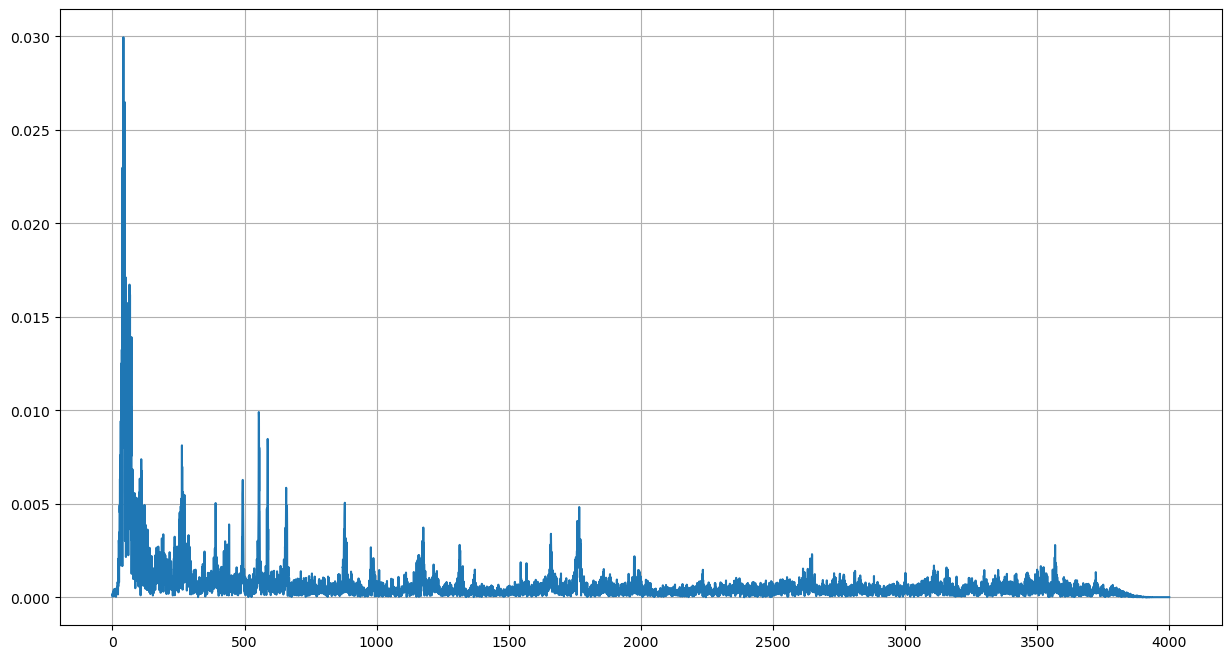

In [18]:
# plot de la FFT de la tranche du signal En VoltEff
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(f_tranche, Y_eff_tranche)
ax.grid()


### Capture de la FFT du signal

**FFT du signal Audio**

![Signal en dBm](Screenshot_5.png)

On remarque bien sur les 2 captures de la FFT de la tranche du signal, que la fréquence de coupure est la même

### Filtrage d'un signal Audio

In [19]:
import scipy.signal as sc

999.9999999999999
(array([128], dtype=int64),)


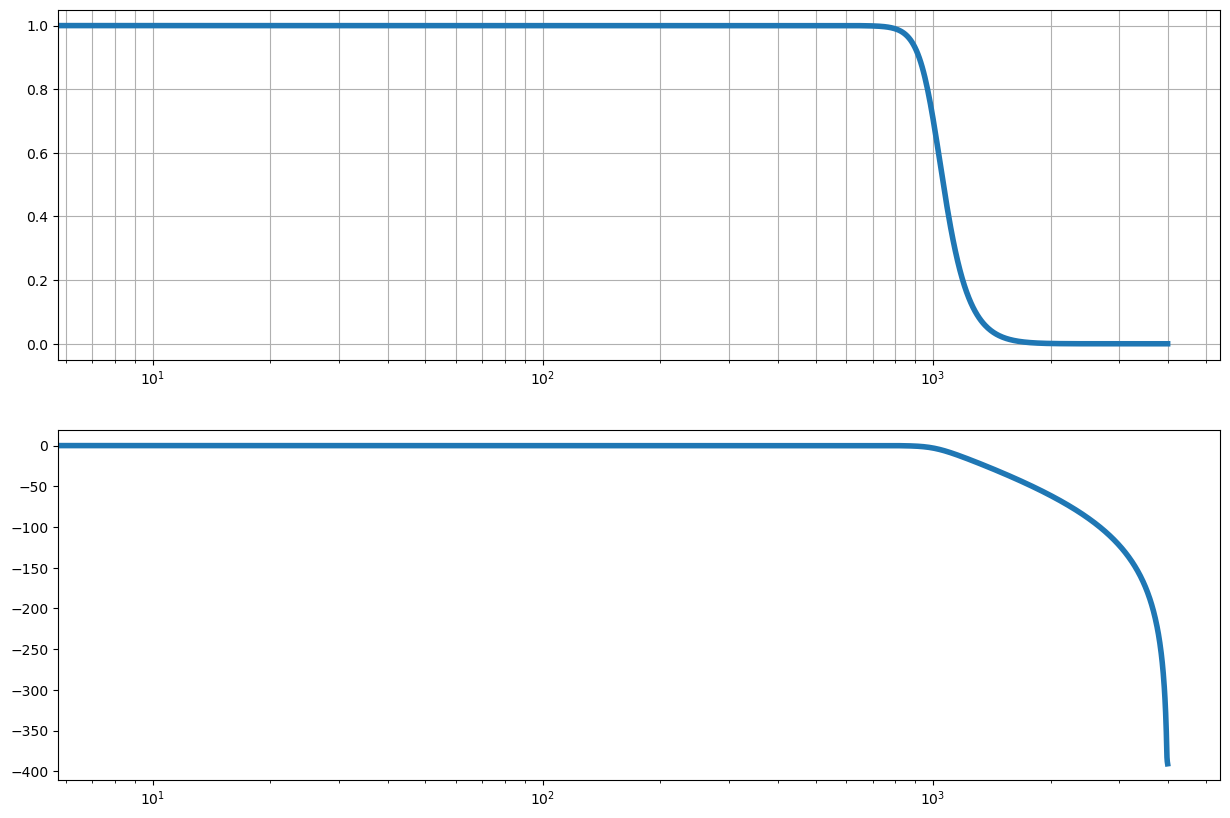

In [20]:
fc = 1000
order = 8
nyquist = 0.5*fe
fcn = fc/nyquist

# Création du filtre
b, a = sc.butter(order, fcn, btype='low', analog=False)
w, h = sc.freqz(b, a)
f = 0.5*fe*w/ np.pi
print(f[128])
index = np.where(f == 999.9999999999999)
print(index)
# Création du plot
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].semilogx(f, (abs(h)), linewidth = 4)
ax[0].grid(True, which="both")
ax[1].semilogx(f, 20*np.log10(abs(h)), linewidth = 4)
ax[0].grid(True, which="both")

Maintenant que nous avons crée le filtre nous pouvons l'appliquer au signal

(16000,)


(0.28, 0.32)

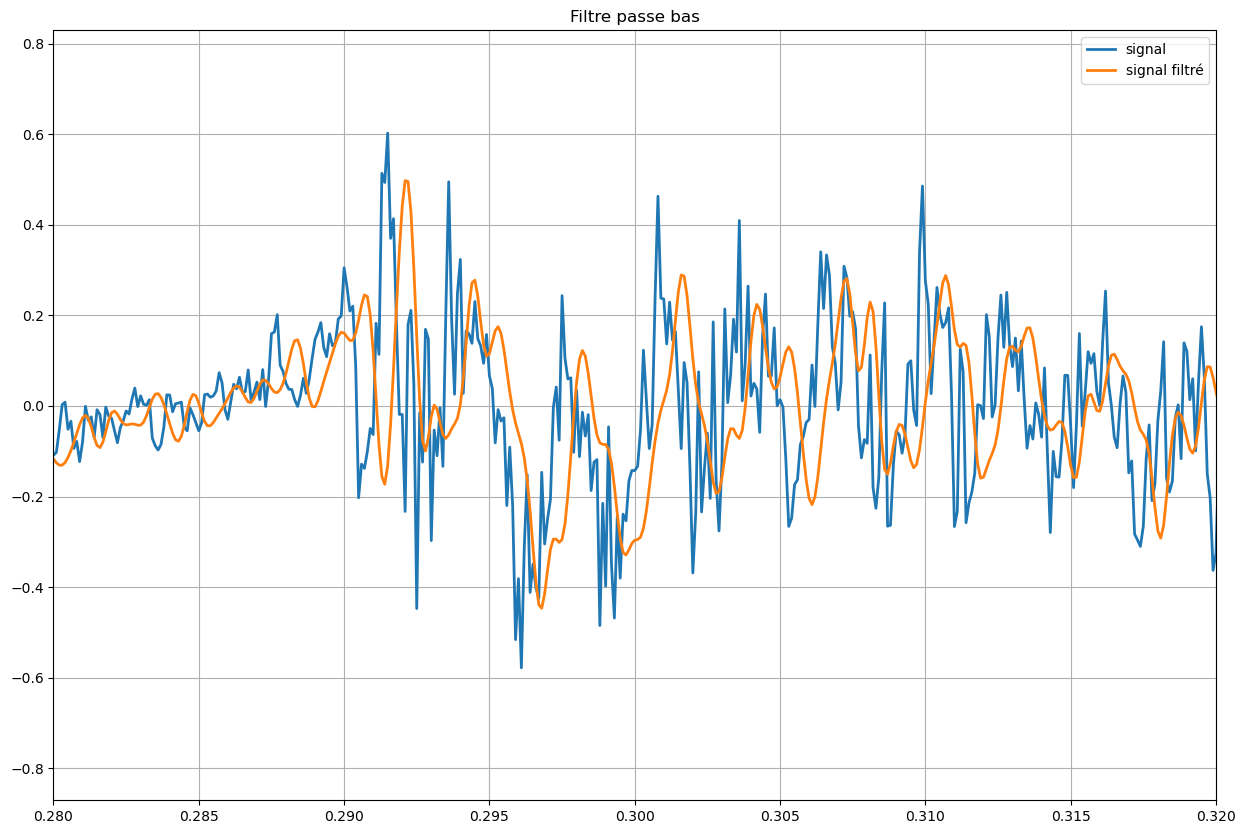

In [21]:
# application du Filtre
filtered = sc.lfilter(b, a, tranche)
print(filtered.shape)

temps2 = np.arange(0, len(tranche)/10000, te)

# Création du plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(temps2, tranche, linewidth = 2, label="signal")
ax.grid(True, which="both")
ax.plot(temps2, filtered, linewidth = 2, label="signal filtré")
fig.set_label('Test')
plt.title("Filtre passe bas")
ax.legend()
ax.set_xlim([0.28, 0.32])
#ax[0].grid(True, which="both")

On passe maintenant a la DSP du signal filtré

In [22]:
# Calcul du nombre de points
N = len(filtered)
tfft = N*te

#Calcul de la FFT bilatérale
Y_filtrered = 1/N*(np.fft.fft(filtered))

#Calcul de la FFT Mono latérale
Y_filtered_mono = np.concatenate((Y_filtrered[0:1], 2*Y_filtrered[1:int(N/2)]))
Y_filtered_mod = np.abs(Y_filtered_mono)


# Calcul de la Densité spectrale en Volt efficace sur RBW
Y_eff_filtered = Y_filtered_mod/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
Y_dBm_filtered = 10*np.log10(np.square(Y_eff_filtered)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f_filtered = np.arange(0, fe/2, fe/N)


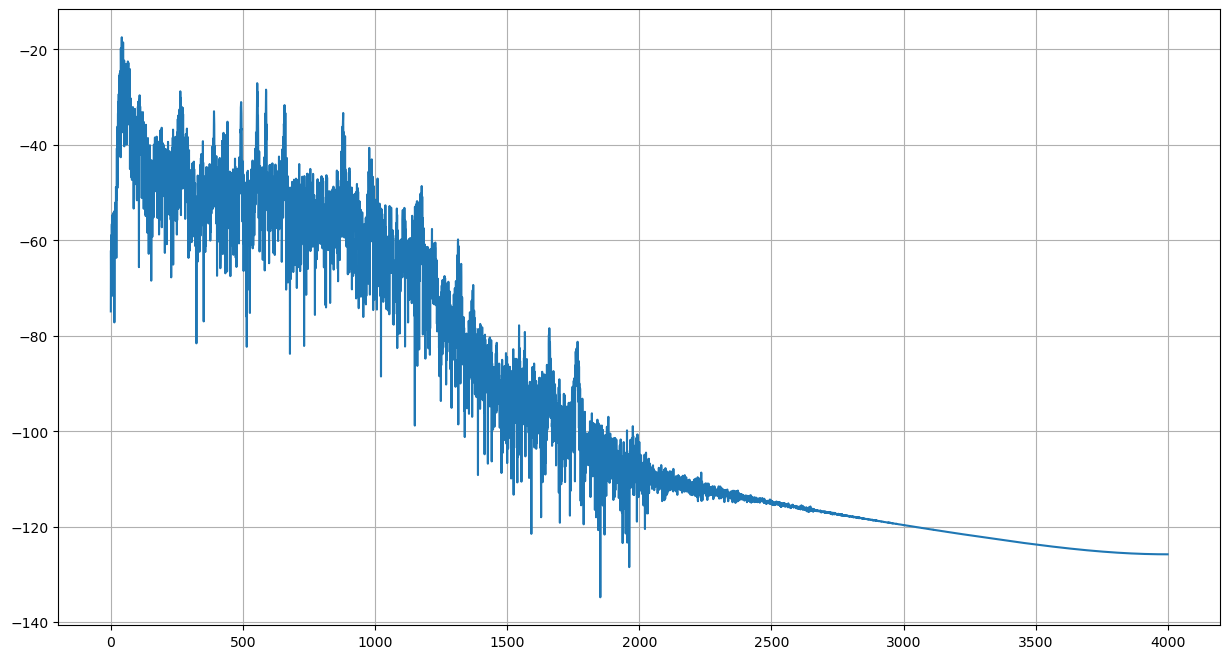

In [23]:
# plot de la FFT du signal filtrée En dBm
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(f_filtered, Y_dBm_filtered)
ax.grid()

Calcul du module de la fonction de transfert du filtre

In [24]:
mod_H = abs(h)
print(20*np.log10(mod_H[128]))

-3.0102999566398454


Maintenant voici la DSP du signal non filtré, filtré ainsi que le module du filtre

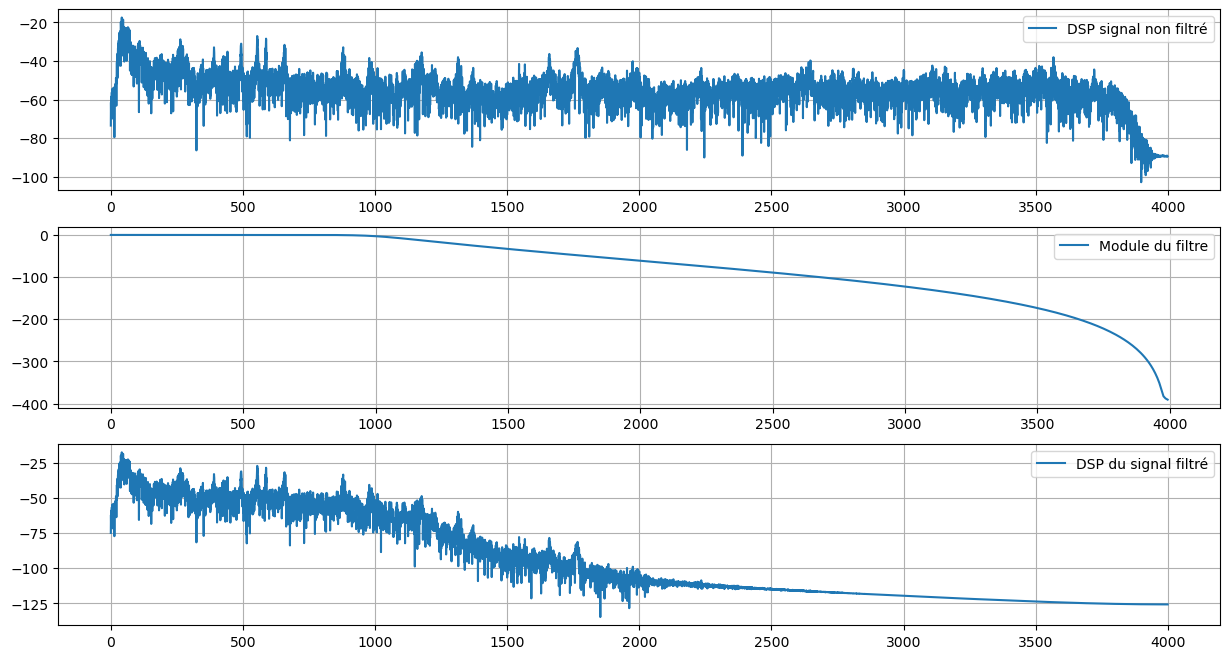

In [25]:
# plot de la FFT du signal filtrée En dBm
fig, ax = plt.subplots(3, 1, figsize=(15, 8))
ax[0].plot(f_tranche, Y_dBm_tranche, label="DSP signal non filtré")
ax[1].plot(f, 20*np.log10(abs(h)), label="Module du filtre")
ax[2].plot(f_filtered, Y_dBm_filtered, label="DSP du signal filtré")
ax[1].grid()
ax[1].legend()
ax[2].grid()
ax[2].legend()
ax[0].grid()
ax[0].legend()

Enregistrement Du signal Filtré avec Soundfile

In [26]:
sf.write("NR2_filtre.wav", filtered, fe)

In [27]:
import IPython
IPython.display.Audio("NR2_filtre.wav", autoplay=True)
IPython.display.Audio("NR2.wav", autoplay=True)

Nous allons maintenant créer un vecteur stéreo contenant le signal filtré et non filtré

In [28]:
# signal stereo, signal audio filtrer + signal audio non filtrer
stereo = np.vstack([filtered, tranche])
IPython.display.Audio(stereo, rate=fe, autoplay=True)

In [29]:
sf.write("NR2_filtre_stereo.wav", stereo.T, fe)

Voici la DSP du signal Audio et du signal filtré vue de l'osciloscope :

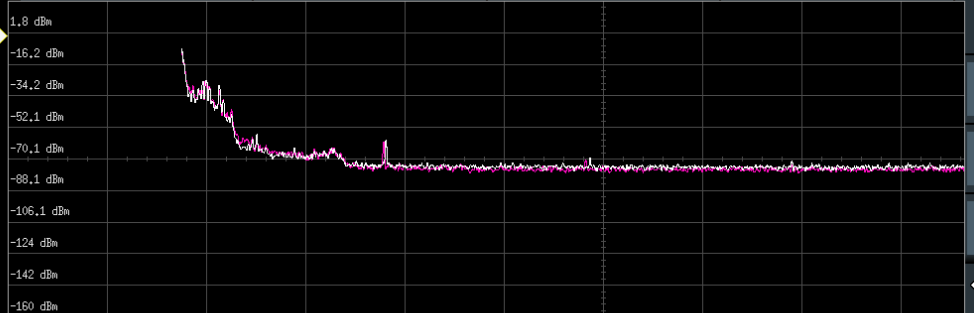

# IV Analyse et Filtrage des signaux ADSL/ADSL2+ et VDSL2

Visualisation du signal ADSL à l'osciloscope 

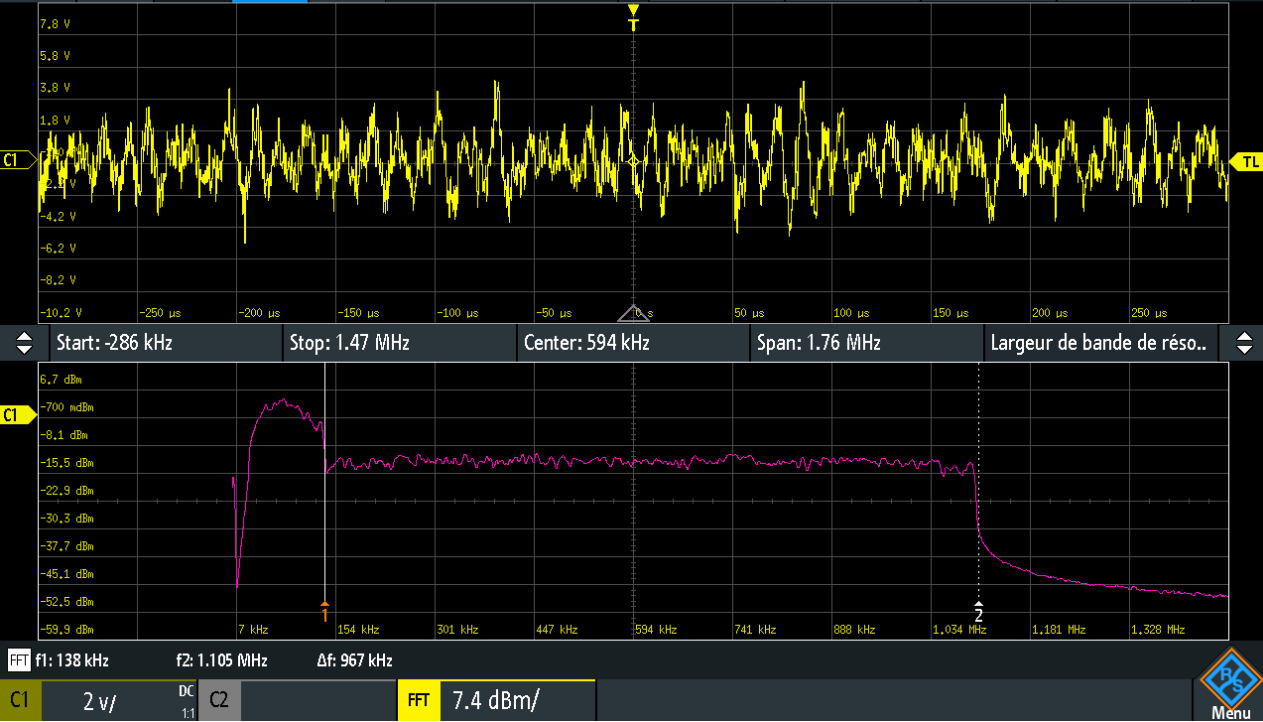

On a donc d'après la capture une fréquence max de 1104MHz et on en déduit donc une fréquence d'échantillonnage de   2208Mhz

On remarque sur l'interface de gestion du DSLAM le débit de celui-ci :
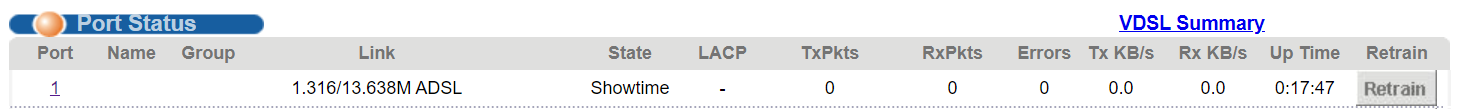

qui est donc de 1.31Mbps (montant) et 13.63Mbps (descente)

### ADSL2+

voici le débit pour le canal ADSL2+ : 
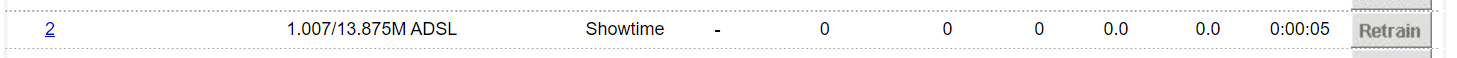
1.007/13.875Mbps ADSL2+

Et voici donc la transformé de fourrier :
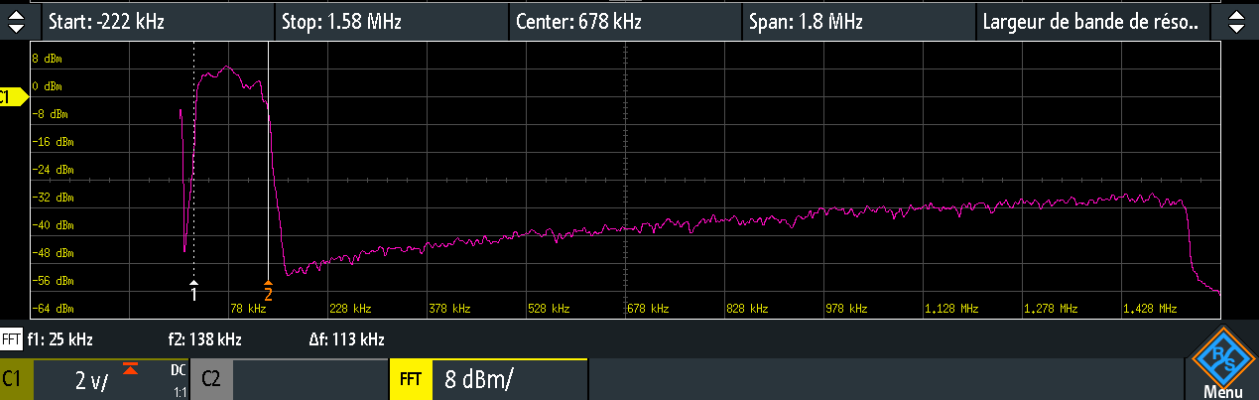

On a donc une largeur de bande 2 fois plus grande on peut en déduire que plus la largeur de bande est proportionnel au débit. 

Voidi la FFT du signal et sa représentation temporelle :
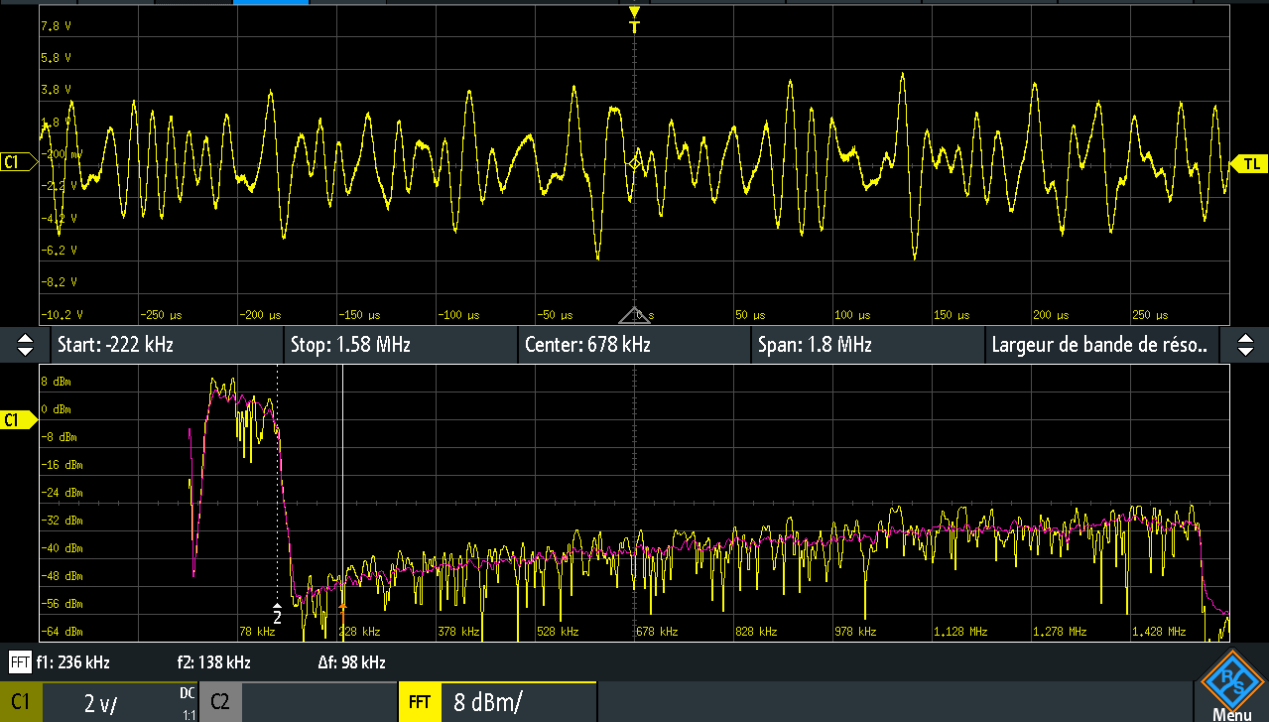

La résolution en fréquence sur RBW est 2208 et la fréquence d'échantillonnage est $ 2208*2 = 4416kHz$

On a donc comme valeur moyenne de la bande descendante : 1175kHz, -23.8dBm. Ensuite pour la valeur moyenne de la bande montante, -14.5dBm et 83kHz.

[file.csv](attachment:file.CSV)

la première ligne et la première colonne de ce fichier correspond en réalité au secondes.

Pour retrouver la fréquence d'échantillonnage on effectue : $\frac{1}{\Delta t}$ = $ \frac{1}{(-3.037e^{-1}) -(2.99998e^{-4})}$ = 200000000Hz = 200MHz

### Récupération des données ADSL2+

In [60]:
data = np.loadtxt("file.CSV", delimiter=",", skiprows=1)
adsl2 = data[:, 1]
print(adsl2)

te = data[1, 0] - data[0, 0]
print(te)
fe = 1/te

print(fe)

# Calcul du nombre de points
N = len(adsl2)
tfft = N*te

#Calcul de la FFT bilatérale
Y_adsl2 = 1/N*(np.fft.fft(adsl2))

#Calcul de la FFT Mono latérale
Y_adsl2_mono = np.concatenate((Y_adsl2[0:1], 2*Y_adsl2[1:int(N/2)]))
Y_adsl2_mod = np.abs(Y_adsl2_mono)


# Calcul de la Densité spectrale en Volt efficace sur RBW
Y_eff_adsl2 = Y_adsl2_mod/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
Y_dBm_adsl2 = 10*np.log10(np.square(Y_eff_adsl2)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f_adsl2 = np.arange(0, fe/2, fe/N)

temps_adsl2=data[:, 0]
print(temps_adsl2)

[-0.3037 -0.2842 -0.3037 ... -1.935  -1.964  -1.954 ]
4.999999999970306e-09
200000000.00118777
[-0.0003     -0.00029999 -0.00029999 ...  0.00029998  0.00029999
  0.00029999]


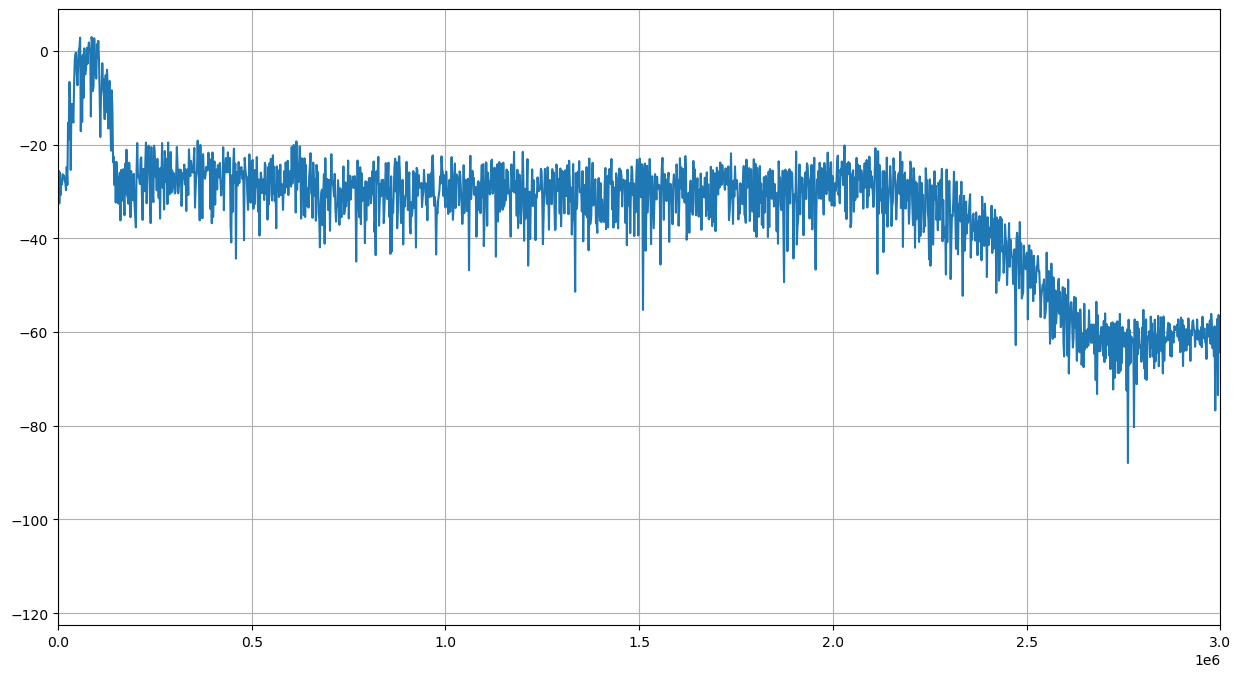

In [59]:
# plot de la FFT de la tranche du signal En VoltEff
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(f_adsl2, Y_dBm_adsl2)
ax.set_xlim(0, 3e6)
ax.grid()
